In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!kaggle datasets download emineyetm/fake-news-detection-datasets

Dataset URL: https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets
License(s): unknown
100% 41.0M/41.0M [00:00<00:00, 130MB/s]
100% 41.0M/41.0M [00:00<00:00, 123MB/s]


In [3]:
import zipfile

with zipfile.ZipFile('fake-news-detection-datasets.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [4]:
fake_data = pd.read_csv("/content/News _dataset/Fake.csv")
true_data = pd.read_csv("/content/News _dataset/True.csv")

In [5]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_data["subject"].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [8]:
true_data['subject'].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145


##Count the fake news data types and the fake news data types


<ipython-input-9-4f8b225b3aff>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


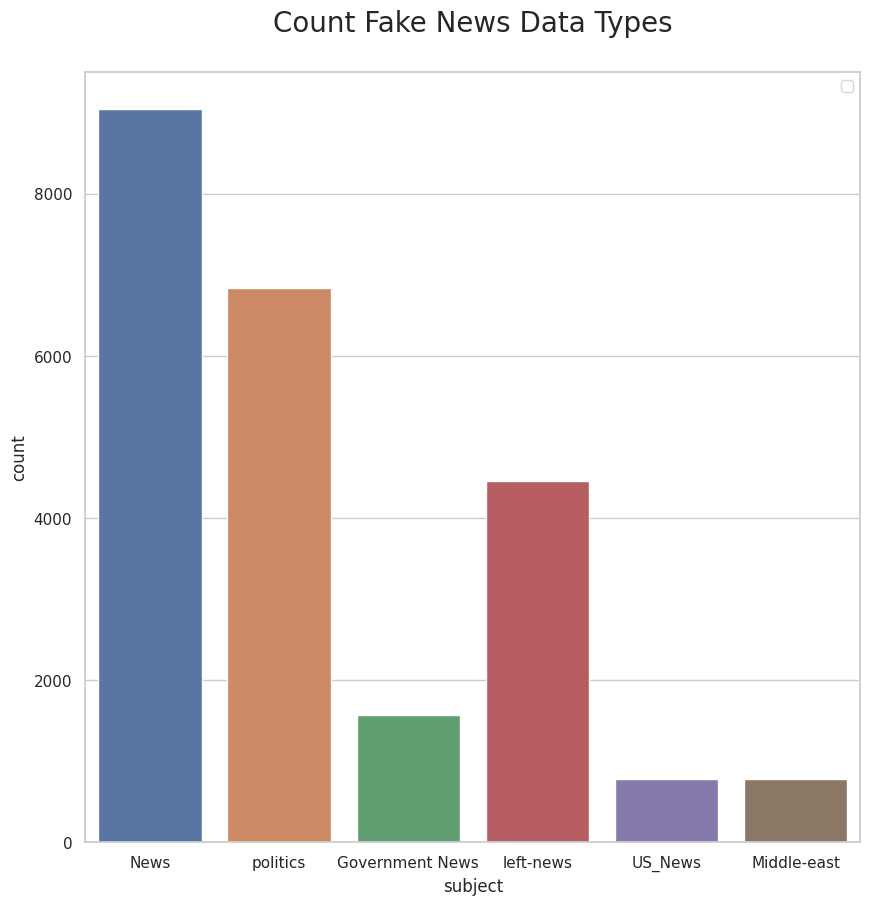

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(10,10))
sns.set_theme(style="whitegrid")
sns.countplot(x="subject",data=fake_data,hue="subject")
plt.title("Count Fake News Data Types\n",fontsize=20)
plt.legend(loc="best")
plt.show()
plt.savefig('count-fake-news-data-types.png')

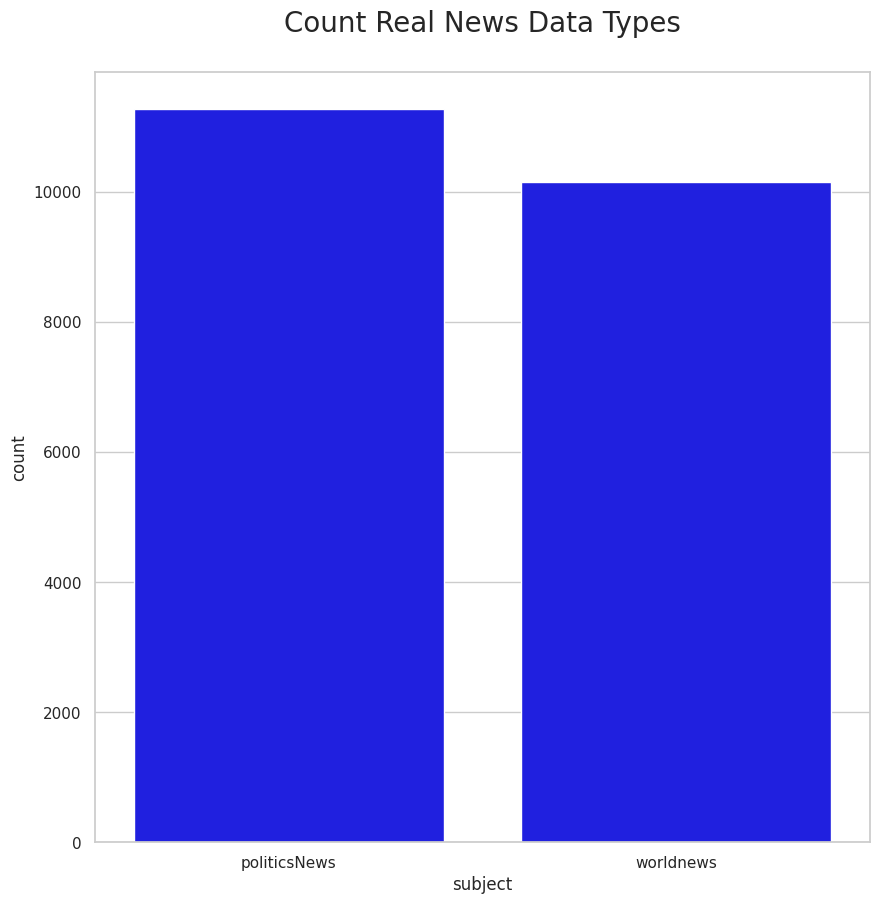

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x=true_data["subject"],color='blue')
plt.title("Count Real News Data Types\n",fontsize=20)
plt.show()
plt.savefig('count-true-news-data-types.png')

#Fake Data WordCloud and True Data WordCloud

In [11]:
from wordcloud import WordCloud, STOPWORDS

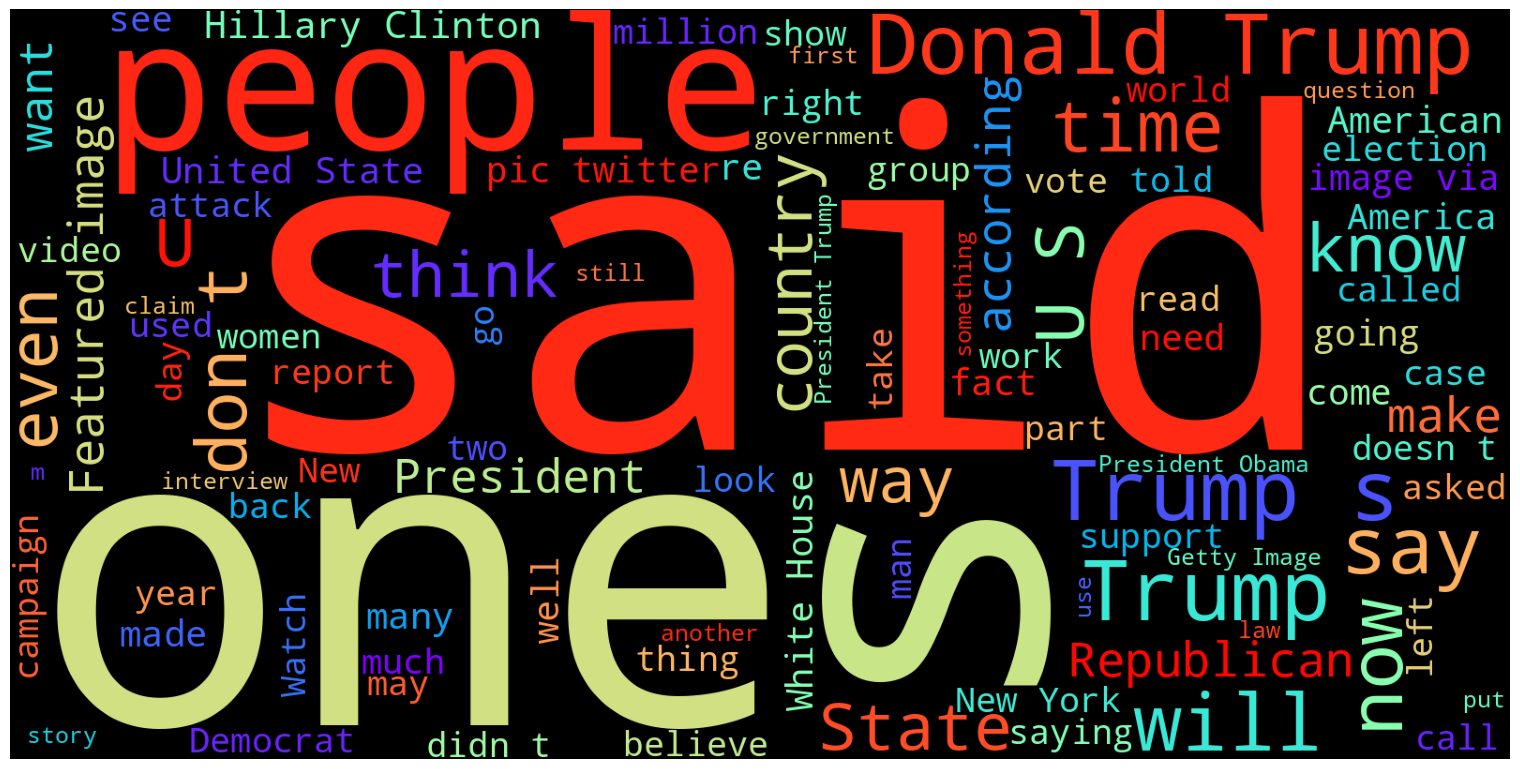

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(15,15))
fake_text=" ".join(fake_data["text"].tolist())
wordcloud=WordCloud(stopwords=STOPWORDS,width=1600,height=800,max_words=100,colormap='rainbow').generate(fake_text)

plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()
plt.savefig('fake-data-wordcloud.png')

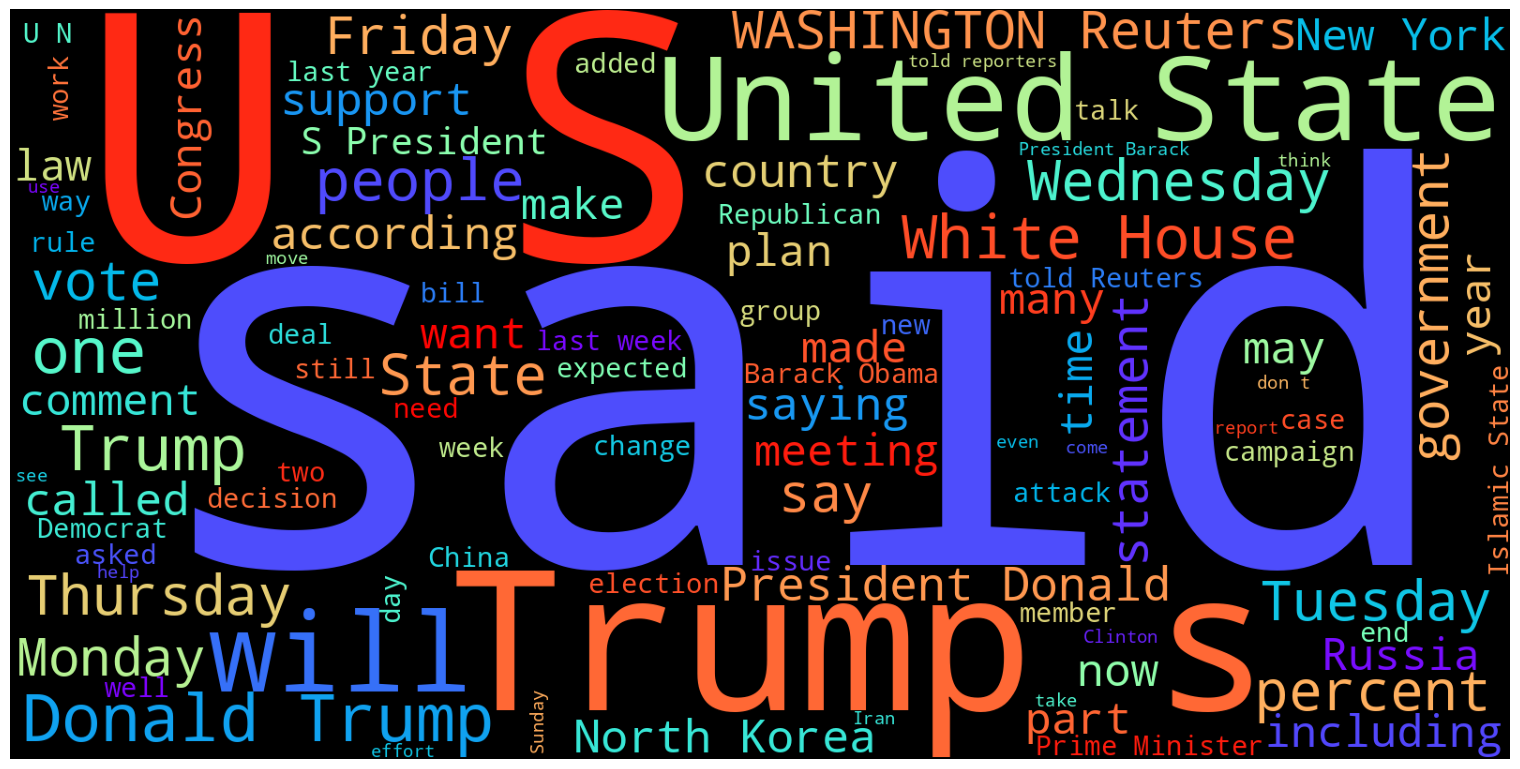

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(15,15))
true_text=" ".join(true_data["text"].tolist())
wordcloud=WordCloud(stopwords=STOPWORDS,width=1600,height=800,max_words=100,colormap='rainbow').generate(true_text)

plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()
plt.savefig('true-data-wordcloud.png')

#Checking the true dataset for the unknown publishers

In [14]:
unknown_publishers=[]
for index,row in enumerate(true_data.text.values):
   try:
     record=row.split("-",  maxsplit=1)
     record[1]

     assert(len(record[0])<120)
   except:
    unknown_publishers.append(index)

In [15]:
true_data.iloc[unknown_publishers].text

,text
7,The following statements were posted to the ve...
8,The following statements were posted to the ve...
12,The following statements were posted to the ve...
13,The following statements were posted to the ve...
14,"(In Dec. 25 story, in second paragraph, corre..."
...,...
20135,(Story corrects to million from billion in pa...
20500,"(This Sept 8 story corrects headline, clarifi..."
20667,"(Story refiles to add dropped word not , in ..."
21246,(Story corrects third paragraph to show Mosul...


In [16]:
real_data=true_data.drop(8970,axis=0)

In [17]:
publisher=[]
temp_text=[]
for index,row in enumerate(true_data.text.values):
  if index in unknown_publishers:
    temp_text.append(row)
    publisher.append("unknow")
  else:
    record=row.split("-",maxsplit=1)
    publisher.append(record[0].strip())
    temp_text.append(record[1].strip())

In [18]:
true_data["publisher"]=publisher
true_data["text"]=temp_text

In [19]:
true_data.sample(5)

,title,text,subject,date,publisher
3744,Factbox: U.S. industry wish list in Trump regu...,U.S. industry groups have submitted hundreds o...,politicsNews,"May 17, 2017",(Reuters)
189,Trump congratulates Democrat for Alabama U.S. ...,U.S. President Donald Trump congratulated Demo...,politicsNews,"December 13, 2017",WASHINGTON (Reuters)
13751,Detained Ugandan journalists charged with libe...,Uganda on Monday charged eight managers and ed...,worldnews,"November 27, 2017",KAMPALA (Reuters)
12148,Mattis says North Korean ICBM not yet a 'capab...,U.S. Defense Secretary Jim Mattis said on Frid...,worldnews,"December 15, 2017",WASHINGTON (Reuters)
6478,Democrats want strong response to intel report...,The top Democrats on the U.S. Senate and House...,politicsNews,"January 6, 2017",WASHINGTON (Reuters)


In [20]:
empty_fake_index=[index for index,text in enumerate(fake_data.text.tolist()) if str(text).strip()==""]

In [21]:
fake_data.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [22]:
true_data["text"] =true_data["title"]+""+ true_data["text"]
fake_data["text"] =fake_data["title"]+""+ fake_data["text"]

In [23]:
true_data["text"]=true_data["text"].apply(lambda x:str(x).lower())
fake_data["text"]=fake_data["text"].apply(lambda x:str(x).lower())

In [24]:
true_data["label"]=1
fake_data["label"]=0

In [25]:
true_data=true_data[["text","label"]]

In [26]:
fake_data=fake_data[["text","label"]]

In [27]:
final_data = pd.concat([true_data, fake_data], ignore_index=True)

In [28]:
final_data.sample(5)

,text,label
14766,kenya court grants access to poll returns in c...,1
40677,anti-trump radical taunts trump supporters wit...,0
28541,megyn kelly laughably claims fox news does no...,0
12086,islamic state claims pakistan church attack: a...,1
5378,'i'm not ranting and raving.' trump on defensi...,1


In [29]:
final_data.shape

(44898, 2)

<ipython-input-30-b3f7d23c3a31>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


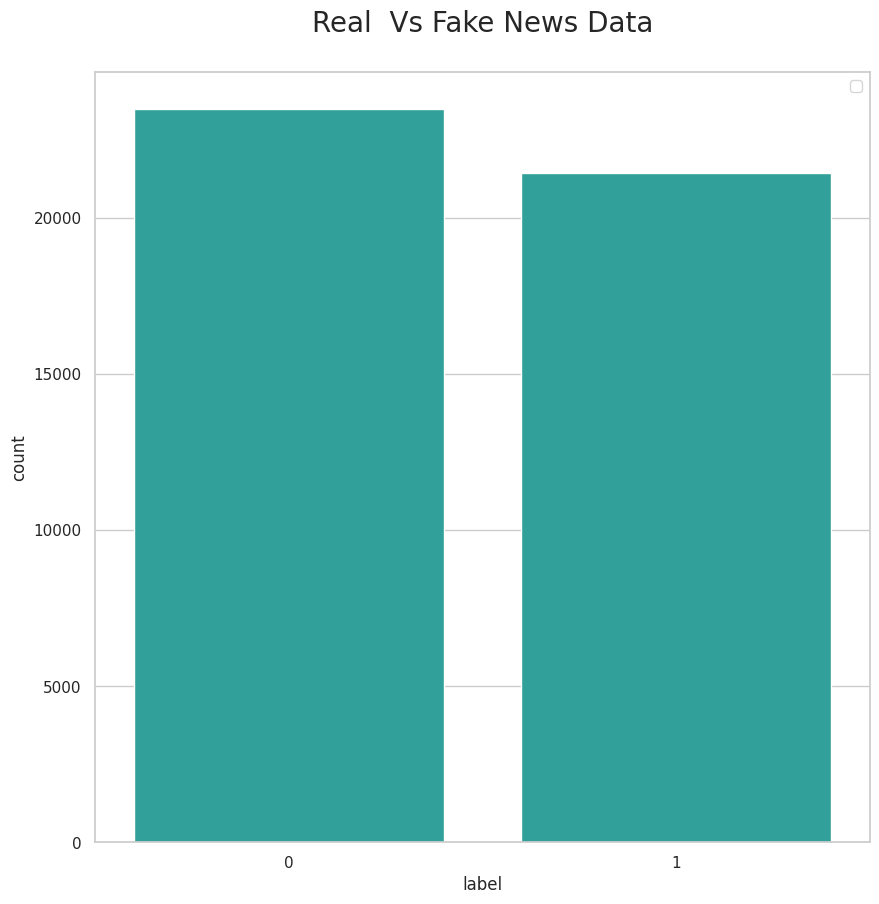

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(x="label",data=final_data,color="lightseagreen")
plt.title("Real  Vs Fake News Data\n",fontsize=20)
plt.legend(loc="best")
plt.show()
plt.savefig('real-news-vs-fake-news.png')

In [31]:
!pip install preprocess_kgptalkie

In [32]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('english')
print(stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data cleaning

In [33]:
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# import re
# import string
# from bs4 import BeautifulSoup


# def clean_text(text):
#     if isinstance(text, str):
#         text = BeautifulSoup(text, 'html.parser').get_text()
#         text = re.sub(r"[^a-zA-Z]", " ", text)
#         text = text.translate(str.maketrans("", "", string.punctuation))

#         emoji_pattern = re.compile("["
#                                    u"\U0001F600-\U0001F64F"
#                                    u"\U0001F300-\U0001F5FF"
#                                    u"\U0001F680-\U0001F6FF"
#                                    u"\U0001F1E0-\U0001F1FF"
#                                    u"\U00002702-\U000027B0"
#                                    u"\U000024C2-\U0001F251"
#                                    "]+", flags=re.UNICODE)
#         text = emoji_pattern.sub(r'', text)

#         text = re.sub(r"#.*", "", text)
#         text = re.sub(r"/\*.*?\*/", "", text, flags=re.DOTALL)
#         text = text.lower()


#         nltk_stop_words = set(stopwords.words('english'))
#         tokens = word_tokenize(text)
#         tokens = [word for word in tokens if word not in nltk_stop_words]

#         text = ' '.join(tokens)

#         return text
#     else:
#         return ""
import nltk

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
from bs4 import BeautifulSoup


def clean_text(text):
    if isinstance(text, str):
        text = BeautifulSoup(text, 'html.parser').get_text()
        text = re.sub(r"[^a-zA-Z]", " ", text)
        text = text.translate(str.maketrans("", "", string.punctuation))

        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"
                                   u"\U0001F300-\U0001F5FF"
                                   u"\U0001F680-\U0001F6FF"
                                   u"\U0001F1E0-\U0001F1FF"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        text = re.sub(r"#.*", "", text)
        text = re.sub(r"/\*.*?\*/", "", text, flags=re.DOTALL)
        text = text.lower()


        nltk_stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in nltk_stop_words]

        text = ' '.join(tokens)

        return text
    else:
        return ""

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [34]:
final_data["text"]=final_data["text"].apply(clean_text)

<ipython-input-33-01a8d0bda072>:52: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  text = BeautifulSoup(text, 'html.parser').get_text()


In [35]:
text_data=final_data["text"].copy()

label_data=final_data["label"].values

In [36]:
corpus = []
for i in range(0, len(text_data)):
    review = text_data[i]
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

In [37]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences


embedding_dim=100


vocab_size = 20000
onehot_encoding=[one_hot(words,vocab_size)for words in corpus]


max_len=1000
embedded_docs=pad_sequences(onehot_encoding,maxlen=max_len,padding='pre')


In [38]:
X_data = np.array(embedded_docs)
y_lable = np.array(label_data)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_lable, test_size=0.2, random_state=42)

#Creating the gru model


In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, GRU
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers

In [41]:
model = Sequential([
    Embedding(vocab_size,embedding_dim,input_shape=(max_len,),trainable=False),
    BatchNormalization(),
    GRU(units=128,activation="tanh",kernel_regularizer=regularizers.l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),
    BatchNormalization(),
    Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 1000, 100)           │       2,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1000, 100)           │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 128)                 │          88,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,089,873 (7.97 MB)

 Trainable params: 89,161 (348.29 KB)

 Non-trainable params: 2,000,712 (7.63 MB)

In [44]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1,patience=50)

In [45]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=42,callbacks=[callback])

Epoch 1/10
856/856 ━━━━━━━━━━━━━━━━━━━━ 47s 42ms/step - accuracy: 0.8900 - loss: 0.2629 - val_accuracy: 0.6756 - val_loss: 1.0839
Epoch 2/10
856/856 ━━━━━━━━━━━━━━━━━━━━ 78s 44ms/step - accuracy: 0.9844 - loss: 0.0613 - val_accuracy: 0.9885 - val_loss: 0.0472
Epoch 3/10
856/856 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9901 - loss: 0.0438 - val_accuracy: 0.9673 - val_loss: 0.1104
Epoch 4/10
856/856 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.9914 - loss: 0.0398 - val_accuracy: 0.9898 - val_loss: 0.0454
Epoch 5/10
856/856 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - accuracy: 0.9962 - loss: 0.0266 - val_accuracy: 0.9856 - val_loss: 0.0581
Epoch 6/10
856/856 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9951 - loss: 0.0286 - val_accuracy: 0.9948 - val_loss: 0.0294
Epoch 7/10
856/856 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.9960 - loss: 0.0265 - val_accuracy: 0.9884 - val_loss: 0.0530
Epoch 8/10
856/856 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.9971 - loss: 0.0228 - 

In [46]:
# import zipfile
# import os

# def zip_folder(folder_path, output_path):
#   """Zips a folder and its contents.

#   Args:
#     folder_path: The path to the folder to zip.
#     output_path: The path to the output zip file.
#   """
#   with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, _, files in os.walk(folder_path):
#       for file in files:
#         file_path = os.path.join(root, file)
#         zipf.write(file_path, os.path.relpath(file_path, folder_path))

# # Example usage:
# zip_folder('/content', '/content.zip')

In [47]:
import pickle

filename = 'fake-news.sav'
pickle.dump(model, open(filename, 'wb'))

In [48]:
model.save("fake_news_model.h5")

In [55]:
def model_loss_and_accuracy(history):

    fig=plt.figure(figsize=(10,10))
    plt.subplot(221)
    plt.plot(history.history["accuracy"],"b*--",label="accuracy")
    plt.plot(history.history["val_accuracy"],"r*--",label="val_accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Accuracy")
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()


    plt.subplot(222)
    plt.plot(history.history["loss"],"b*--",label="loss")
    plt.plot(history.history["val_loss"],"r*--",label="val_loss")
    plt.title("Model Loss")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.grid(color = 'green', linestyle = '--', linewidth = 1)
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    plt.savefig("model-metrics.png")

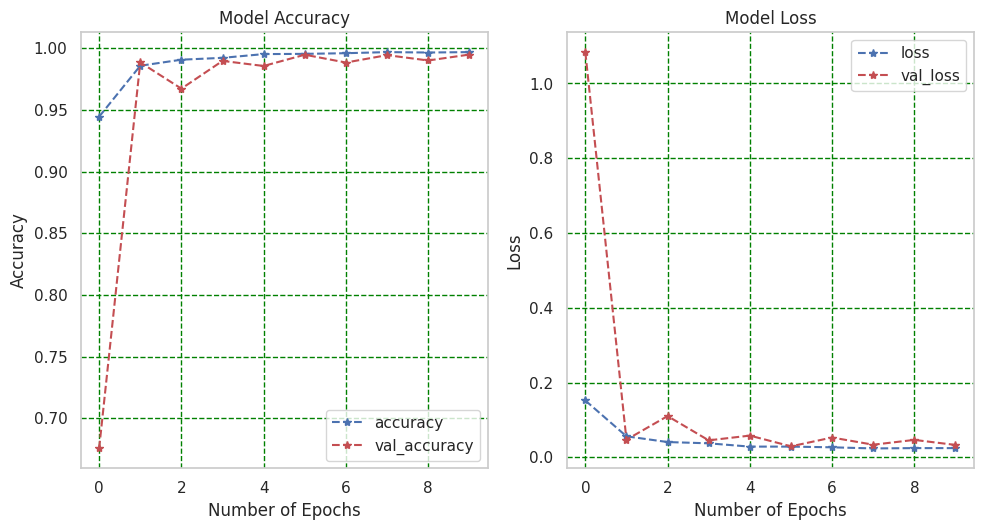

<Figure size 640x480 with 0 Axes>

In [56]:
 model_loss_and_accuracy(history)

In [51]:
class_name=["Fake","True"]

In [52]:
predict_label=(model.predict(X_test) > 0.5).astype("int32")
confusion_matrix = confusion_matrix(y_test,predict_label)


281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step


In [53]:
confusion_matrix_label = ["True Negative","False Negative","False Positive","True Positive"]
confusion_matrix_value_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
confusion_matrix_value_percentage= ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
confusion_matrix_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(confusion_matrix_label,confusion_matrix_value_counts ,confusion_matrix_value_percentage)]
confusion_matrix_labels = np.asarray(confusion_matrix_labels).reshape(2,2)

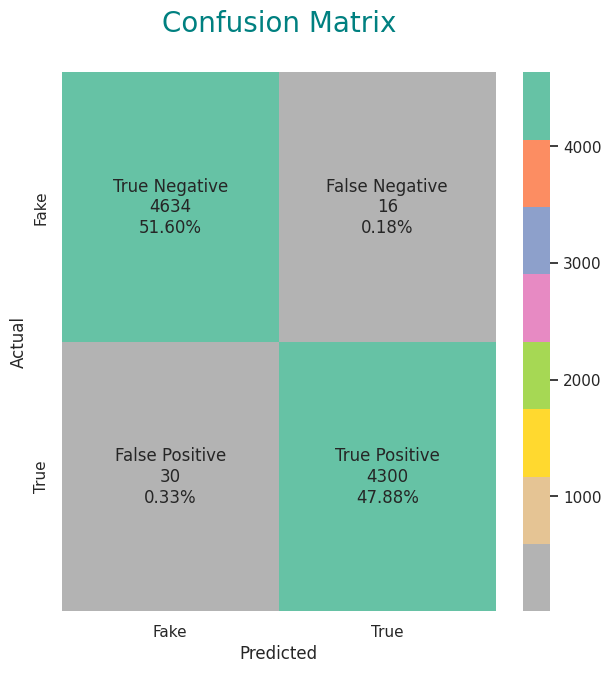

<Figure size 640x480 with 0 Axes>

In [57]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix, annot=confusion_matrix_labels, fmt="", cmap='Set2_r',xticklabels=class_name,yticklabels=class_name)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix\n",fontsize=20,color="teal")
plt.show()
plt.savefig("confusion-matrix.png")

In [58]:
print(classification_report(y_test,predict_label,target_names=["Fake","True"]))

              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00      4650
        True       1.00      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



#CustomData  prediction

In [59]:
custom_data="Iran's leaders have portrayed the anti-government protests as  instigated by foreign enemies"

In [60]:
test_data= []
for i in range(0, len(custom_data)):
    review =custom_data[i]
    review = review.split()
    review = ' '.join(review)
    test_data.append(review)

In [61]:
voc_size = 100
onehot_repr=[one_hot(words,voc_size)for words in test_data]
sent_length=20
embedded_docs=pad_sequences(onehot_repr,maxlen=sent_length,padding='pre')
test_data=np.array(embedded_docs)

In [62]:
prediction=(model.predict(test_data)>0.5).astype(int)

if(prediction[0]==0):
  print("News is Fake")
else:
  print("News is Real")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
News is Fake
